In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import math

well_df = pd.read_excel("Oil Well Dataset.xlsx")
#Show the 1st 5 rows of the original dataset
well_df.head()

,DATEPRD,ON_STREAM_HRS,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2014-04-22,24.0,107.362,37.939,78.935,631,90439,0
1,2014-04-23,24.0,99.187,60.757,70.627,1166,165720,0
2,2014-04-24,24.0,94.601,63.047,66.049,1550,221707,0
3,2014-04-25,24.0,89.988,64.547,61.405,1249,178064,0
4,2014-04-26,24.0,84.777,65.724,56.148,1346,192602,0


In [8]:
well_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATEPRD        7994 non-null   datetime64[ns]
 1   ON_STREAM_HRS  7994 non-null   float64       
 2   AVG_WHP_P      7994 non-null   float64       
 3   AVG_WHT_P      7994 non-null   float64       
 4   DP_CHOKE_SIZE  7994 non-null   float64       
 5   BORE_OIL_VOL   7994 non-null   int64         
 6   BORE_GAS_VOL   7994 non-null   int64         
 7   BORE_WAT_VOL   7994 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 499.8 KB


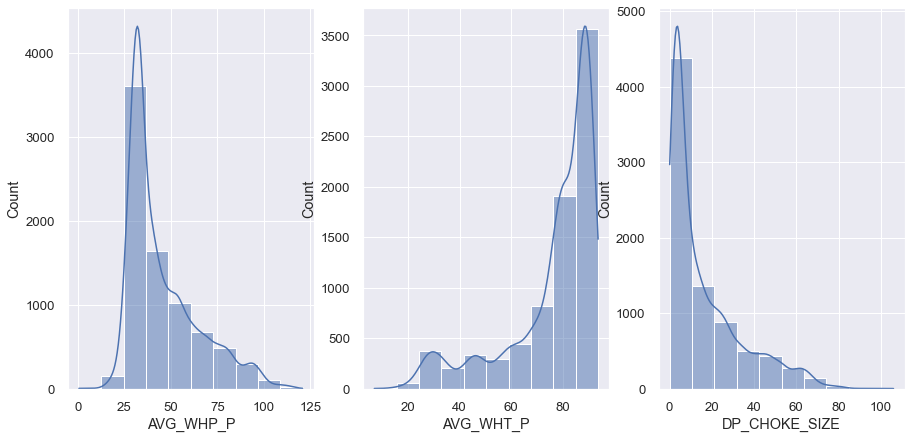

In [9]:
### Visualize the pressure, temperature, and chole data

# Use the seaborn style and set the font size
plt.style.use("seaborn")
sns.set(font_scale=1.2)

# Create the figure and axis for the subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))

# Plot a histogram for elongation on the first axis
sns.histplot(well_df["AVG_WHP_P"], kde=True, ax=ax1, bins=10)

# Plot a histogram for yield strength on the second axis
sns.histplot(data=well_df["AVG_WHT_P"], kde=True, ax=ax2, bins=10)

# Plot a histogram for tensile strength on the third axis
sns.histplot(data=well_df["DP_CHOKE_SIZE"], kde=True, ax=ax3, bins=10)

# Show the plot
plt.show()

# Close the plot
plt.close()

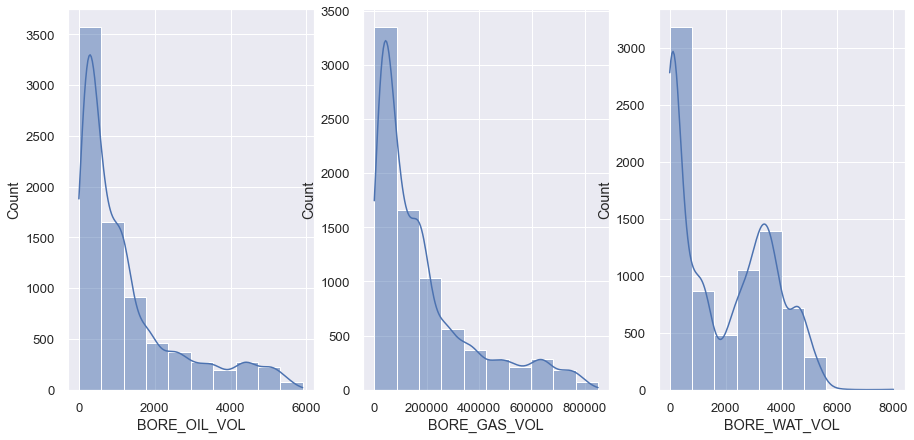

In [27]:
### Visualize the oil, gas, and water flow data

# Use the seaborn style and set the font size
plt.style.use("seaborn")
sns.set(font_scale=1.2)

# Create the figure and axis for the subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))

# Plot a histogram for elongation on the first axis
sns.histplot(well_df["BORE_OIL_VOL"], kde=True, ax=ax1, bins=10)

# Plot a histogram for yield strength on the second axis
sns.histplot(data=well_df["BORE_GAS_VOL"], kde=True, ax=ax2, bins=10)

# Plot a histogram for tensile strength on the third axis
sns.histplot(data=well_df["BORE_WAT_VOL"], kde=True, ax=ax3, bins=10)

# Show the plot
plt.show()

# Close the plot
plt.close()

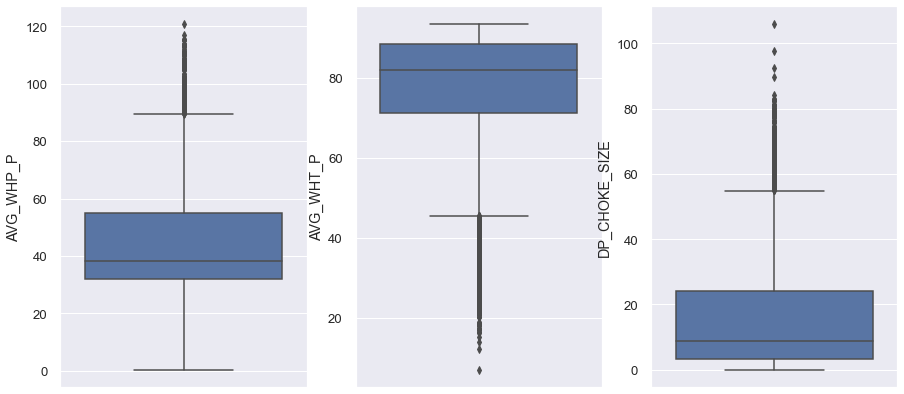

In [10]:
##Better visualize the input data using boxplots that show: mean, interquartile range, and outliers. dataiku, data fusion

# Set plotting style and font size
plt.style.use("seaborn")
sns.set(font_scale=1.2)

# Create the figure and axis
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))

# Assigning a graph to each axis
sns.boxplot(y=well_df["AVG_WHP_P"], ax=ax1)
sns.boxplot(y=well_df["AVG_WHT_P"], ax=ax2)
sns.boxplot(y=well_df["DP_CHOKE_SIZE"], ax=ax3)

# Display the plot
plt.show()

In [11]:
###Prepare the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# normalize new input data (AVG_WHP_P, AVG_WHT_P, DP_CHOKE_SIZE)
def normalize_data(df = well_df):
    df_min_max_scaled = df.copy() # create a copy of the input DataFrame
    # iterate over each column in the copy and normalize it
    for column in df_min_max_scaled.columns[2:5]:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    # convert the normalized DataFrame to a list
    x = df_min_max_scaled[df_min_max_scaled.columns[2:5]].values.tolist()
    return x # return the list

# split the data to training and testing samples
def split_data(output, df=well_df):
    x = normalize_data(df) # normalize the data using the previous function
    y = df[output].values.tolist() # extract the output column and convert it to a list
    # split the data into training and testing sets using a 75:25 split and a fixed random state of 3
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)
    return x_train, x_test, y_train, y_test # return the training and testing sets

# normalize a new datapoint
def normalize_point(point):
    df_slice = well_df[well_df.columns[2:5]] # extract a slice of the original DataFrame containing the input columns
    # iterate over each input column in the slice and normalize the corresponding value in the input point
    for i in range(len(df_slice.columns)):
        point[i] = (point[i] - df_slice[df_slice.columns[i]].min()) / (df_slice[df_slice.columns[i]].max() - df_slice[df_slice.columns[i]].min())
    return np.array([point])

In [12]:
#Statistics for the dataset's features

well_df.describe()

,ON_STREAM_HRS,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000
mean,23.076377,45.242725,76.083092,16.157600,1253.148862,184219.484613,1916.258944
std,3.428835,18.933902,17.627835,17.357452,1343.577746,190231.486836,1694.498731
min,0.250000,0.490000,7.037000,0.050000,1.000000,89.000000,0.000000
25%,24.000000,31.942000,71.241500,3.351250,272.000000,42194.250000,170.250000
50%,24.000000,38.180500,81.887000,8.773000,716.000000,111226.000000,1486.000000
75%,24.000000,54.962000,88.442000,23.985750,1651.000000,251342.500000,3412.750000
max,25.000000,120.889000,93.510000,106.035000,5902.000000,851132.000000,8020.000000


In [13]:
# Run KNN model and evaluate it using k-fold cross-validation for R-squared score and RMSE
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#train the KNN model
def run_model_KNN_reg(n_neighbours, n_folds = 5):

    # Define the input independent variable
    X = np.array(normalize_data(well_df))

    # Create the k-fold cross-validation object
    kf = KFold(n_splits=n_folds, shuffle=True, random_state = 42)

    # Save the cross-validation score for each flow
    cross_valid_dict_r2 = {}
    cross_valid_dict_rmse = {}

    for flow in well_df.columns[5:]:
        # Define the dependent variable 
        y = np.array(well_df[flow].values.tolist())

        # Initialize the r-squared scores list for each fold
        train_r2 = np.zeros(n_folds)
        test_r2 = np.zeros(n_folds)
        train_rmse = np.zeros(n_folds)
        test_rmse = np.zeros(n_folds)
        
        # Loop over the folds
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            
            # Split the data into training and test sets
            X_train, y_train = X[train_index], y[train_index]
            X_test, y_test = X[test_index], y[test_index]

            knn_model = KNeighborsRegressor(n_neighbors=n_neighbours)
            
            # Fit the model to the training data
            knn_model.fit(X_train, y_train)
            
            # Make predictions on the training and test data
            y_train_pred = knn_model.predict(X_train)
            y_test_pred = knn_model.predict(X_test)
            
            # Compute the R^2 score for the training and test data
            train_r2[i] = r2_score(y_train, y_train_pred)
            test_r2[i] = r2_score(y_test, y_test_pred)

            # Compute the RMSE score for the training and test data
            train_rmse[i] = mean_squared_error(y_train, y_train_pred, squared=False)
            test_rmse[i] = mean_squared_error(y_test, y_test_pred, squared=False)
            
        # Compute the mean and standard deviation of the R^2 scores for the training and test data accross all folds
        mean_train_r2 = np.mean(train_r2)
        std_train_r2 = np.std(train_r2)
        mean_test_r2 = np.mean(test_r2)
        std_test_r2 = np.std(test_r2)

        # Compute the mean and standard deviation of the RMSE scores for the training and test data accross all folds
        mean_train_rmse = np.mean(train_rmse)
        std_train_rmse = np.std(train_rmse)
        mean_test_rmse = np.mean(test_rmse)
        std_test_rmse = np.std(test_rmse)
        
        # Save the results for each element
        cross_valid_dict_r2[flow] = [[mean_test_r2, std_test_r2], [mean_train_r2, std_train_r2]]
        cross_valid_dict_rmse[flow] = [[mean_test_rmse, std_test_rmse], [mean_train_rmse, std_train_rmse]]
    
    return cross_valid_dict_r2, cross_valid_dict_rmse

# Run the model
cross_valid_dict_r2, cross_valid_dict_rmse = run_model_KNN_reg(6, 5)

In [14]:
cross_valid_dict_r2

{'BORE_OIL_VOL': [[0.8866120408682064, 0.01162793396871217],
  [0.9219187834090515, 0.001986369479830154]],
 'BORE_GAS_VOL': [[0.8831728662897449, 0.010325241004470933],
  [0.9195226339088778, 0.0017090805828082589]],
 'BORE_WAT_VOL': [[0.9274836636010677, 0.012285753246332284],
  [0.9485132032192402, 0.00260240767275561]]}

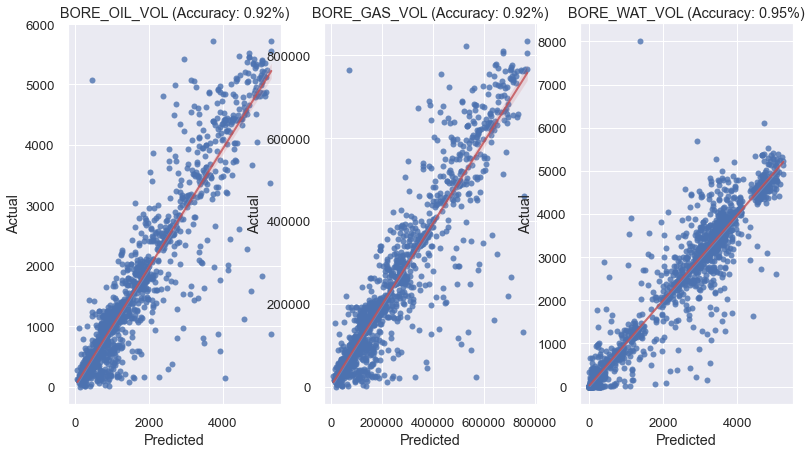

In [15]:
##Visualize KNN regression performance

flows_accuracies = [0.92, 0.92, 0.95]

#Scatter plot of predicted vs actual output for each flow
#Create figure and axes
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 7))
axes = [ax1, ax2, ax3]

flows_cols = ["BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL"]

for i in range(3):
    #Plot prediction vs actual for each flow
    x_train, x_test, y_train, y_test = split_data(flows_cols[i], well_df)
    reg = KNeighborsRegressor(n_neighbors=6)
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    sns.regplot(x=y_pred, y=y_test, line_kws={"color":"r","alpha":0.8,"lw":2}, ax=axes[i]).set(
        title=flows_cols[i]+" (Accuracy: {}%)".format(flows_accuracies[i]), xlabel='Predicted', ylabel='Actual')
plt.show()
plt.close()

In [22]:
cross_valid_dict_r2["BORE_OIL_VOL"]

[[0.8866120408682064, 0.01162793396871217],
 [0.9219187834090515, 0.001986369479830154]]

In [28]:
## Visualize the effect of hyperparameters
# The effect of "k-neighbours" on KNN regression
# Define list which stores average R-squared scores

avg_r2_test = []
avg_r2_train = []

neighbors_settings = range(1, 100)

flows_keys = ["BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL"]

# Loop through every neighbours setting
for n in neighbors_settings:

    # Run model at this number of neighbours
    cross_valid_dict_r2, cross_valid_dict_rmse = run_model_KNN_reg(n)

    # Save average R-squared score for each element accross their minimum and maximum limits using previous model
    flows_r2_test = []
    flows_r2_train = []

    # Loop through all elements and find their average R-squared
    j = 0
    for i in range(3):
        flows_r2_test.append(cross_valid_dict_r2[flows_keys[i]][0][0])
        flows_r2_train.append(cross_valid_dict_r2[flows_keys[i]][1][0])

    # Find average R-squared score accross all elements and append it
    avg_r2_test.append(sum(flows_r2_test) / len(flows_r2_test))
    avg_r2_train.append(sum(flows_r2_train) / len(flows_r2_train))

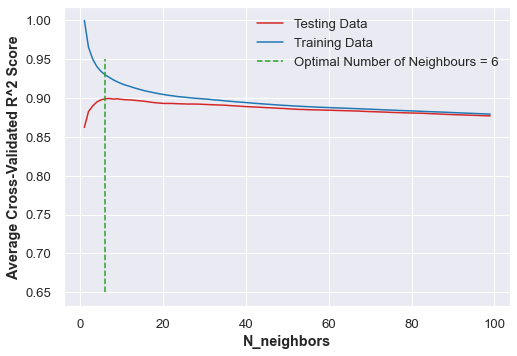

In [25]:
plt.plot(neighbors_settings, avg_r2_test, label="Testing Data", color = "tab:red")
plt.plot(neighbors_settings, avg_r2_train, label="Training Data", color = "tab:blue")
plt.plot([6]*100, np.linspace(0.65, 0.95, 100), "--", color = "tab:green", label = "Optimal Number of Neighbours = 6")
plt.ylabel("Average Cross-Validated R^2 Score", weight = "bold")
plt.xlabel("N_neighbors", weight="bold")
plt.legend()

In [26]:
# Function to predict the flwos of a new datapoint using KNN

def test_point_KNN(point, n=6,  df = well_df):
    norm_point = normalize_point(point)
    pred_flow = {}
    for flow in list(well_df.columns)[5:]:
        x_train, x_test, y_train, y_test = split_data(flow)
        reg = KNeighborsRegressor(n_neighbors=n)
        reg.fit(x_train, y_train)
        pred = float("{:.3f}".format(reg.predict(norm_point)[0]))
        pred_flow[flow] = pred
    return pred_flow
    
test_point = [60, 80, 10]
test_point_KNN(test_point)

{'BORE_OIL_VOL': 2671.333,
 'BORE_GAS_VOL': 370858.167,
 'BORE_WAT_VOL': 1199.667}